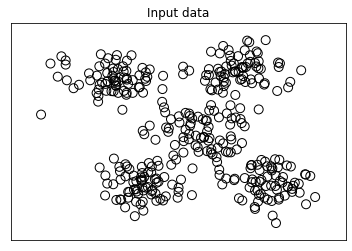

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import metrics

# Load input data
X = np.loadtxt('C:/gitRepo/ai-python/3-2학기/2주차/data_clustering.txt', delimiter=',')
num_clusters = 5

# Plot input data
plt.figure()
plt.scatter(X[:, 0], X[:, 1], marker='o',
            facecolors='none', edgecolors='black', s=80)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.title('Input data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


- 입력된 데이터를 표시하기 위한 부분
    - 파일 경로에서 txt파일을 load한 뒤 클러스터 수를 지정.
    - 시각화 하기 위해서 pyplot 라이브러리 사용
    - x가 가진 데이터들 중 최소값의 -1부터 최댓값 +1까지를 x_min, x_max로 지정
    - y가 가진 데이터들 중 최소값의 -1부터 최댓값 +1까지를 y_min, y_max로 지정
    - 이후 시각화하기 위해 x,y값의 범위를 팔레트에 지정해 준 뒤 show로 출력.

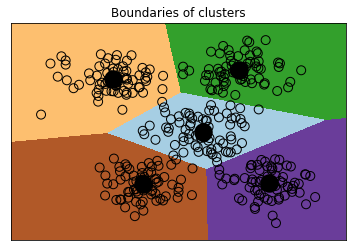

In [2]:
# Create KMeans object
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)

# Train the KMeans clustering model
kmeans.fit(X)

# Step size of the mesh
step_size = 0.01

# Define the grid of points to plot the boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_vals, y_vals = np.meshgrid(np.arange(x_min, x_max, step_size),
                             np.arange(y_min, y_max, step_size))

# Predict output labels for all the points on the grid
output = kmeans.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

# Plot different regions and color them
output = output.reshape(x_vals.shape)
plt.figure()
plt.clf()
plt.imshow(output, interpolation='nearest',
           extent=(x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()),
           cmap=plt.cm.Paired, aspect='auto', origin='lower')

# Overlay input points
plt.scatter(X[:, 0], X[:, 1], marker='o',
            facecolors='none', edgecolors='black', s=80)

# Plot the centers of clusters
cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
            marker='o', s=210, linewidths=4, color='black',
            zorder=12, facecolors='black')

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.title('Boundaries of clusters')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

- sklearn 라이브러리중 K-means를 이용하여 클러스터링
    - 입력된 데이터를 이용하여 Training 진행
    - 서로 다른 클러스터 부분을 다른 색으로 표시
    - 입력된 데이터를 표시하고 클러스터링 된 각 부분의 중심점 표시